In [140]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as ppt
from scipy import signal
from sklearn.preprocessing import StandardScaler
from scipy.signal import savgol_filter

In [141]:
data = pd.read_csv("nola.csv")
years = data.iloc[:,0].values
births = data.iloc[:,1].values
inv_im = data.iloc[:,2].values
pol_uni = data.iloc[:,3].values
wages = data.iloc[:,4].values

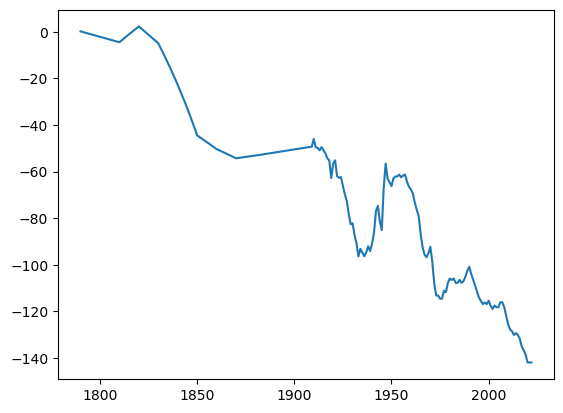

In [142]:
ppt.plot(years,births)

C:\Users\akhil\anaconda3\lib\site-packages\numpy\lib\polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\akhil\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\akhil\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:223: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
C:\Users\akhil\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:226: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, n - window_length, n, n - halflen, n, axis,


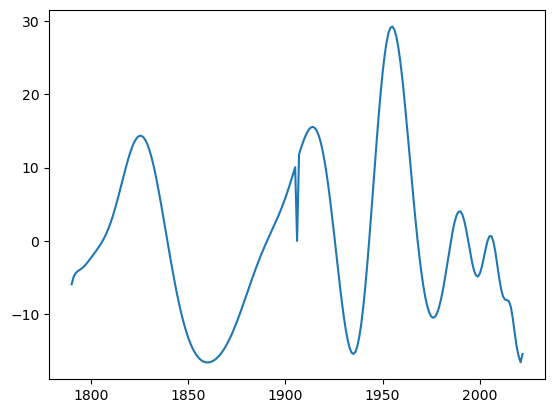

In [143]:
births_det = signal.detrend(births)
births = savgol_filter(births_det,232,116)
ppt.plot(years,births)

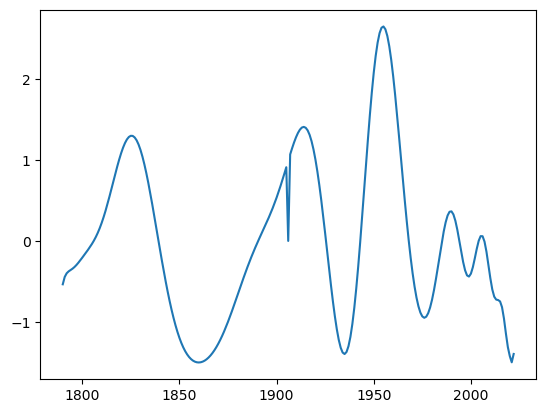

In [144]:
scaler = StandardScaler()
births = np.stack((years,births),axis=1)
births = scaler.fit_transform(births)
births = births[:,1]
ppt.plot(years,births)

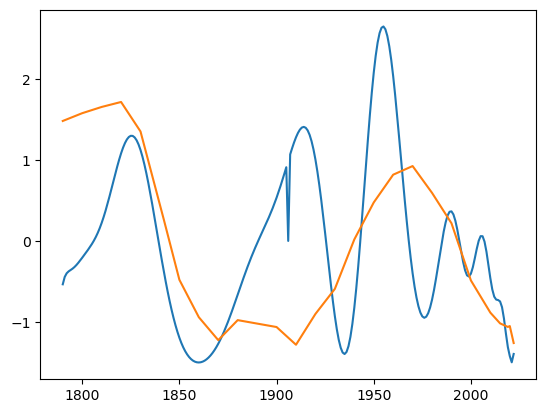

In [145]:
set = np.stack((years,inv_im),axis=1)
set = scaler.fit_transform(set)
inv_im = set[:,1]
metrics = np.stack((births,inv_im),axis=1)
ppt.plot(years,metrics)

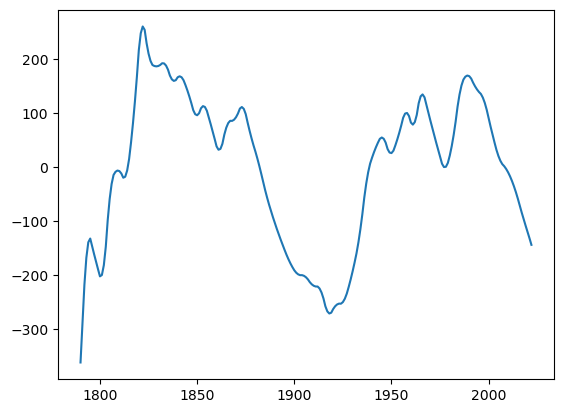

In [146]:
det = signal.detrend(pol_uni)
ppt.plot(years,det)

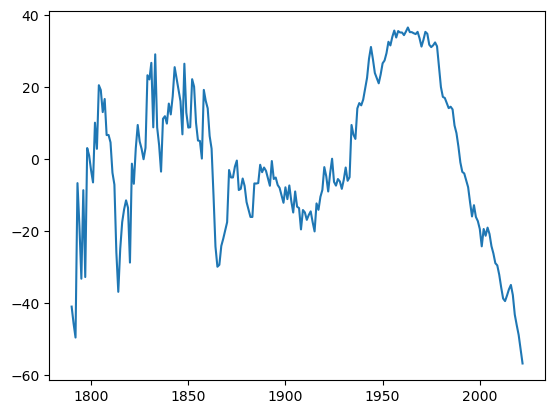

In [147]:
det = signal.detrend(wages)
ppt.plot(years,det)

C:\Users\akhil\anaconda3\lib\site-packages\numpy\lib\polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\akhil\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\akhil\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:223: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
C:\Users\akhil\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:226: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, n - window_length, n, n - halflen, n, axis,


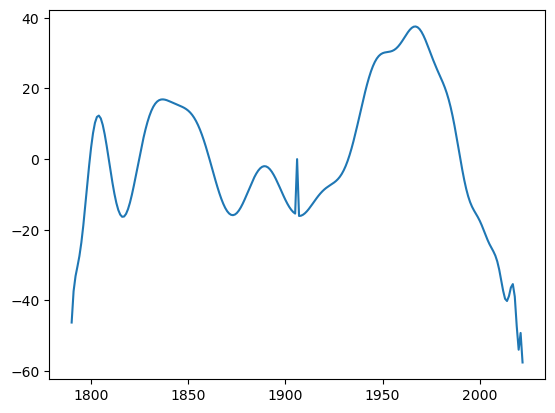

In [148]:
wages = savgol_filter(det,232,116)
ppt.plot(years,wages)

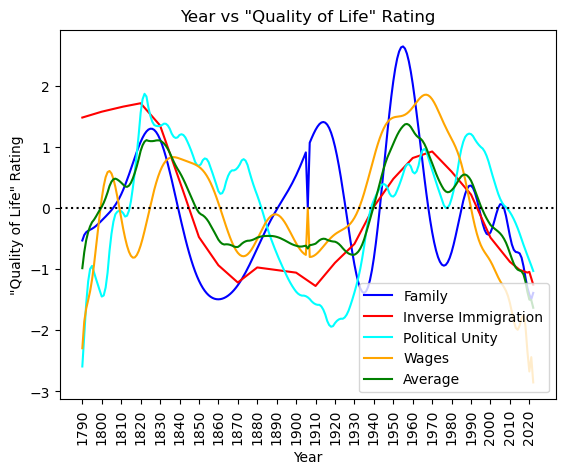

In [149]:
det = signal.detrend(pol_uni)
set = np.stack((years,det,wages),axis=1)
set = scaler.fit_transform(set)
pol_uni = set[:,1]
wages = set[:,2]
average = (pol_uni+births+inv_im+wages)/4
ppt.plot(years,births,color='blue')
ppt.plot(years,inv_im,color='red')
ppt.plot(years,pol_uni,color='cyan')
ppt.plot(years,wages,color='orange')
ppt.plot(years,average,color='green')
ppt.legend(['Family','Inverse Immigration','Political Unity','Wages','Average'])
ppt.axhline(y=0,color='black',linestyle='dotted')
ppt.xticks(np.arange(1790,2021,10),rotation="vertical")
ppt.title("Year vs \"Quality of Life\" Rating")
ppt.ylabel("\"Quality of Life\" Rating")
ppt.xlabel("Year")
ppt.savefig('ground.png')

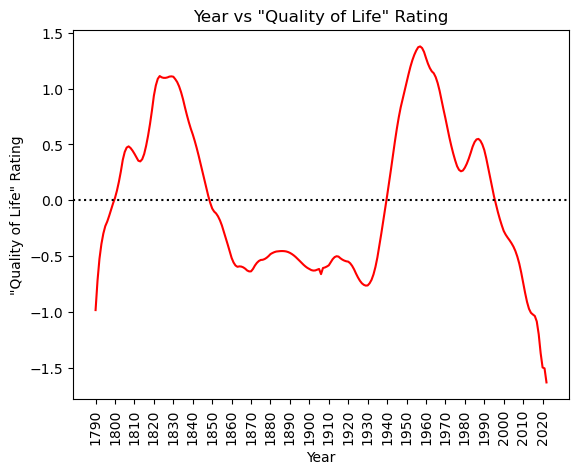

In [150]:
ppt.plot(years,average,color='red')
ppt.axhline(y=0,color='black',linestyle='dotted')
ppt.xticks(np.arange(1790,2021,10),rotation="vertical")
ppt.title("Year vs \"Quality of Life\" Rating")
ppt.ylabel("\"Quality of Life\" Rating")
ppt.xlabel("Year")
ppt.savefig("sky.png")